In [162]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import re

### Cases excel table converting to pandas dataframe

In [163]:
city = 'chelyabinsk'
excel_file_cases = pd.read_excel('../../data/' + city + '/cases.xlsx')
cases_table_from_python_to_excel = {'date': 'Дата',
                    'sars_total_cases': 'Всего_орви', 
                    'sars_cases_age_group_0': '0 - 2_орви',
                    'sars_cases_age_group_1': '3 - 6_орви',
                    'sars_cases_age_group_2': '7 - 14_орви',
                    'sars_cases_age_group_3': '15 и ст._орви',
                    'total_population': 'Всего',
                    'population_age_group_0': '0 - 2',
                    'population_age_group_1': '3 - 6',
                    'population_age_group_2': '7 - 14',
                    'population_age_group_3': '15 и ст.',
                    }
cases_table_from_excel_to_python = {key: value for value, key in cases_table_from_python_to_excel.items()}
cases_df = pd.DataFrame(columns=cases_table_from_python_to_excel.keys())
for col_name in cases_df.columns:
    cases_df[col_name] = excel_file_cases[cases_table_from_python_to_excel[col_name]]

In [164]:
def date_extract(input_string):
    matching = re.search(r'(\d{2}\.\d{2}\.\d{4})', input_string)
    if matching:
        date_string = matching.group(1)
        date_object = datetime.strptime(date_string, "%d.%m.%Y")
        return date_object
    else:
        raise Exception("Incorrect date format!")  

cases_df['datetime'] = cases_df['date'].apply(date_extract)
cases_df = cases_df.fillna(float('nan'))
cases_df.head()

,date,sars_total_cases,sars_cases_age_group_0,sars_cases_age_group_1,sars_cases_age_group_2,sars_cases_age_group_3,total_population,population_age_group_0,population_age_group_1,population_age_group_2,population_age_group_3,datetime
0,2010.1 (04.01.2010 - 10.01.2010),5402,1694,1001,459,2248,1093700,39265,47824,83345,923266,2010-01-04
1,2010.2 (11.01.2010 - 17.01.2010),8287,2121,1505,1202,3459,1093700,39265,47824,83345,923266,2010-01-11
2,2010.3 (18.01.2010 - 24.01.2010),8658,2010,1807,1314,3527,1093700,39265,47824,83345,923266,2010-01-18
3,2010.4 (25.01.2010 - 31.01.2010),8985,2208,1935,1390,3452,1093700,39265,47824,83345,923266,2010-01-25
4,2010.5 (01.02.2010 - 07.02.2010),9022,2101,2004,1487,3430,1093700,39265,47824,83345,923266,2010-02-01


### PCR excel table converting to pandas dataframe

In [165]:
excel_file_pcr = pd.read_excel('../../data/' + city + '/pcr.xlsx')
pcr_table_from_excel_to_python = {'date': 'Дата',
                                  'tested_total': 'Число образцов тестированных на грипп',
                                  'tested_strain_0': 'A (субтип не определен)',
                                  'tested_strain_1': 'A(H1)pdm09',
                                  'tested_strain_2': 'A(H3)',
                                  'tested_strain_3': 'B'
                                  }
pcr_table_from_python_to_excel = {key: value for value, key in pcr_table_from_excel_to_python.items()}

In [166]:
pcr_df = pd.DataFrame(columns=pcr_table_from_excel_to_python.keys())
for col_name in pcr_df.columns:
    pcr_df[col_name] = excel_file_pcr[pcr_table_from_excel_to_python[col_name]]
pcr_df['datetime'] = pcr_df['date'].apply(date_extract)
pcr_df = pcr_df.fillna(float('nan'))

In [167]:
strains_number = 4
for strain_index in range(strains_number):
    str_ind = str(strain_index)
    cases_df['rel_strain_' + str_ind] = pcr_df['tested_strain_' + str_ind]/pcr_df['tested_total']
    cases_df['real_cases_strain_' + str_ind] = (cases_df['rel_strain_' + str_ind]*cases_df['sars_total_cases']).round()

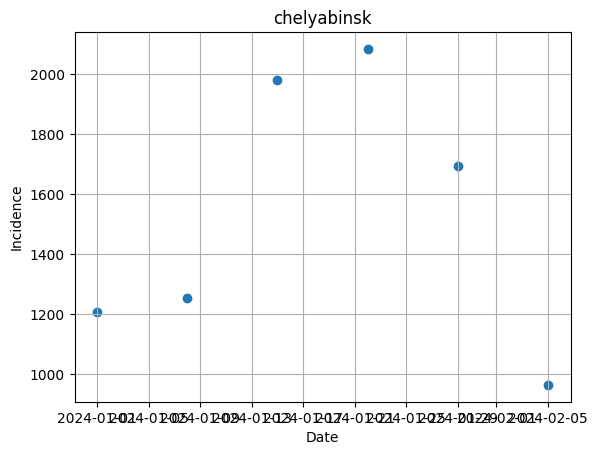

In [171]:
start = pd.to_datetime('12-01-2023')
end = pd.to_datetime('6-20-2025')
plt.grid()
plt.scatter(cases_df[(cases_df['datetime'] < end) & (cases_df['datetime'] > start)]['datetime'],
    cases_df[(cases_df['datetime'] < end) & (cases_df['datetime'] > start)]['real_cases_strain_2'])
plt.xlabel('Date')
plt.ylabel('Incidence')
plt.title(city)
plt.savefig(f'{city}_wave_2023-2024.png', dpi=400)

In [173]:
pcr_df[(pcr_df['datetime'] < end) & (pcr_df['datetime'] > start)]

,date,tested_total,tested_strain_0,tested_strain_1,tested_strain_2,tested_strain_3,datetime
726,2023.49 (04.12.2023 - 10.12.2023),NaN,NaN,NaN,NaN,NaN,2023-12-04
727,2023.50 (11.12.2023 - 17.12.2023),NaN,NaN,NaN,NaN,NaN,2023-12-11
728,2023.51 (18.12.2023 - 24.12.2023),NaN,NaN,NaN,NaN,NaN,2023-12-18
729,2023.52 (25.12.2023 - 31.12.2023),NaN,NaN,NaN,NaN,NaN,2023-12-25
730,2024.1 (01.01.2024 - 07.01.2024),10.0,0.0,0.0,1.0,0.0,2024-01-01
731,2024.2 (08.01.2024 - 14.01.2024),245.0,0.0,0.0,22.0,0.0,2024-01-08
732,2024.3 (15.01.2024 - 21.01.2024),245.0,0.0,0.0,37.0,0.0,2024-01-15
733,2024.4 (22.01.2024 - 28.01.2024),245.0,0.0,0.0,38.0,0.0,2024-01-22
734,2024.5 (29.01.2024 - 04.02.2024),245.0,0.0,0.0,29.0,0.0,2024-01-29
735,2024.6 (05.02.2024 - 11.02.2024),312.0,0.0,0.0,20.0,0.0,2024-02-05


In [172]:
cases_df[(cases_df['datetime'] < end) & (cases_df['datetime'] > start)]

,date,sars_total_cases,sars_cases_age_group_0,sars_cases_age_group_1,sars_cases_age_group_2,sars_cases_age_group_3,total_population,population_age_group_0,population_age_group_1,population_age_group_2,population_age_group_3,datetime,rel_strain_0,real_cases_strain_0,rel_strain_1,real_cases_strain_1,rel_strain_2,real_cases_strain_2,rel_strain_3,real_cases_strain_3
726,2023.49 (04.12.2023 - 10.12.2023),17631,1871,2692,4020,9048,1182517,36159,56353,119143,970862,2023-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
727,2023.50 (11.12.2023 - 17.12.2023),18450,1863,2715,3549,10323,1182517,36159,56353,119143,970862,2023-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728,2023.51 (18.12.2023 - 24.12.2023),19776,1836,2843,3962,11135,1182517,36159,56353,119143,970862,2023-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
729,2023.52 (25.12.2023 - 31.12.2023),19495,1951,2965,4171,10408,1182517,36159,56353,119143,970862,2023-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730,2024.1 (01.01.2024 - 07.01.2024),12082,1434,1911,2183,6554,1182517,36159,56353,119143,970862,2024-01-01,0.0,0.0,0.0,0.0,0.100000,1208.0,0.0,0.0
731,2024.2 (08.01.2024 - 14.01.2024),13969,1542,2170,2317,7940,1182517,36159,56353,119143,970862,2024-01-08,0.0,0.0,0.0,0.0,0.089796,1254.0,0.0,0.0
732,2024.3 (15.01.2024 - 21.01.2024),13113,1312,2056,2700,7045,1182517,36159,56353,119143,970862,2024-01-15,0.0,0.0,0.0,0.0,0.151020,1980.0,0.0,0.0
733,2024.4 (22.01.2024 - 28.01.2024),13443,1551,2381,3068,6443,1182517,36159,56353,119143,970862,2024-01-22,0.0,0.0,0.0,0.0,0.155102,2085.0,0.0,0.0
734,2024.5 (29.01.2024 - 04.02.2024),14327,1672,2696,3673,6286,1182517,36159,56353,119143,970862,2024-01-29,0.0,0.0,0.0,0.0,0.118367,1696.0,0.0,0.0
735,2024.6 (05.02.2024 - 11.02.2024),15049,1851,2779,3666,6753,1182517,36159,56353,119143,970862,2024-02-05,0.0,0.0,0.0,0.0,0.064103,965.0,0.0,0.0
